## Data Exploration of Predicting Bike Sharing TRENDS

#### Dataset is present at :--> https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('hour.csv')
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
print(f"Number of rows are : {data.shape[0]} and the number of features are :{data.shape[1]}")

Number of rows are : 17379 and the number of features are :17


In [6]:
### Lets check if there is any null values in the dataframe

data.isna().sum()

## So, we don't have any null values in our dataset. Thats Great!!

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Since this is not a classification model.Here we have the predict the demand of the bicycles using the features which are present in the dataset. So,our task is to figure out which all are the best features and those, which are not the best we can simply remove it from the dataset.

Now we can remove some of the features like :Instant(as it is my index numbers, so no use of them), dteday(as we already have the details of season, month), yr(now useful for prediction).

In [8]:
data.drop(['instant','dteday','yr'],axis=1,inplace=True)

In [10]:
data.shape

## Now, we can see that 3 features has been removed, as previously we had 17 features and now we have 14 features.

(17379, 14)

Now, Lets talk about some of the classification features, means the features that has mutliple values.We can plot them and we will note there behaviour

In [13]:
data['holiday'].unique()

array([0, 1], dtype=int64)

(array([2502., 2479.,    0., 2453.,    0., 2475., 2471.,    0., 2487.,
        2512.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <a list of 10 Patch objects>)

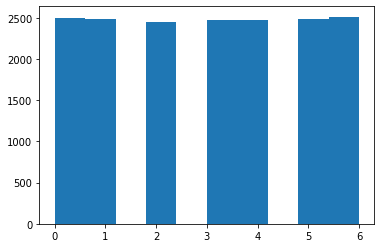

In [35]:
plt.hist(data['weekday'])

(array([ 5514.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 11865.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

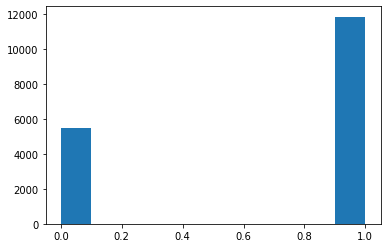

In [24]:
plt.hist(data['workingday'])

### Below we can see that people wil tend to use the bicycle,during working days as compared to off-days

(array([1.1413e+04, 0.0000e+00, 0.0000e+00, 4.5440e+03, 0.0000e+00,
        0.0000e+00, 1.4190e+03, 0.0000e+00, 0.0000e+00, 3.0000e+00]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <a list of 10 Patch objects>)

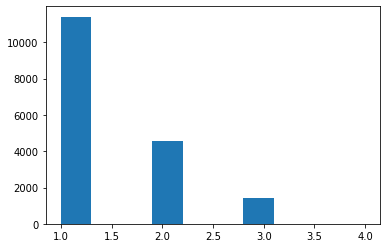

In [23]:
plt.hist(data['weathersit'])

## Below we can see that people will use the bicycle, when we weather is 'Clear', followed by 'Mist' and 'Light snow'.

(array([2770., 1473., 1437., 1488., 1440., 1488., 1475., 1437., 1451.,
        2920.]),
 array([ 1. ,  2.1,  3.2,  4.3,  5.4,  6.5,  7.6,  8.7,  9.8, 10.9, 12. ]),
 <a list of 10 Patch objects>)

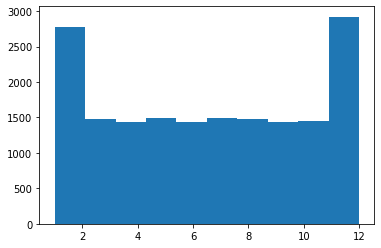

In [36]:
plt.hist(data['mnth'])

## From the below, we can draw the inference that, people use less bicycle in spring season as compared to other season

In [37]:
### IF this doesn't work out then  check the correlation of features with themselves.

data['temp'].corr(data['atemp'])

0.9876721390396492

In [39]:
import seaborn as sns

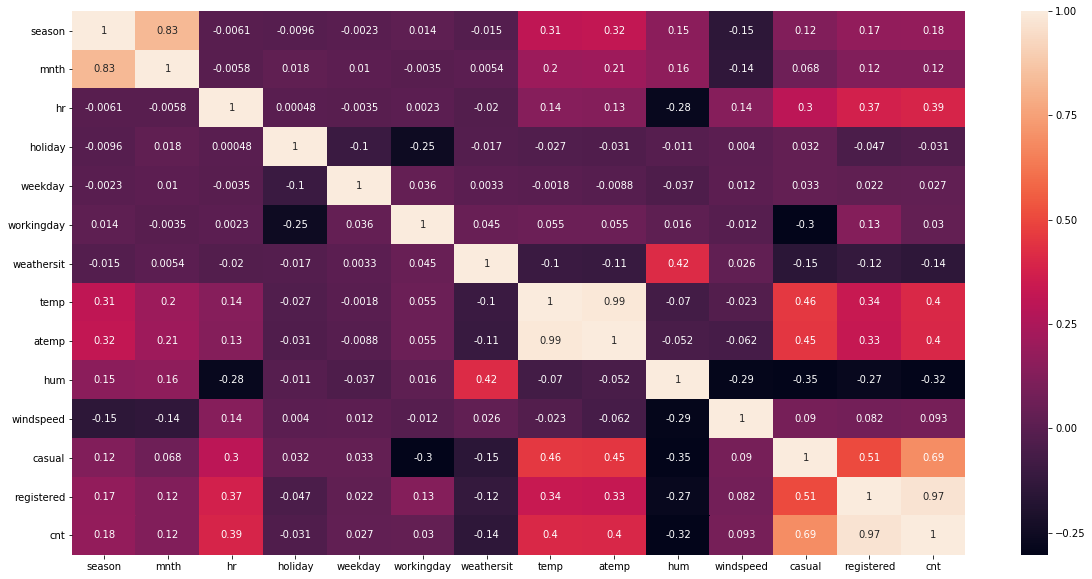

In [45]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(data.corr(),robust=True,annot=True,ax=ax)

From the above, we can see that (season and month) (temp & atemp) are highly correlated, so we can remove one of them

In [48]:
data.drop('atemp',axis=1,inplace=True)

In [52]:
data.drop('season',axis=1,inplace=True)

In [53]:
data.head()

,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,0,0,6,0,1,0.24,0.81,0.0,3,13,16
1,1,1,0,6,0,1,0.22,0.80,0.0,8,32,40
2,1,2,0,6,0,1,0.22,0.80,0.0,5,27,32
3,1,3,0,6,0,1,0.24,0.75,0.0,3,10,13
4,1,4,0,6,0,1,0.24,0.75,0.0,0,1,1


Data Correlation: Is a way to understand the relationship between multiple variables and attributes in your dataset. Using Correlation, you can get some insights such as:
One or multiple attributes depend on another attribute or a cause for another attribute.
One or multiple attributes are associated with other attributes.

So, why is correlation useful?
Correlation can help in predicting one attribute from another (Great way to impute missing values).
Correlation can (sometimes) indicate the presence of a causal relationship.
Correlation is used as a basic quantity for many modelling techniques

If your dataset has perfectly positive or negative attributes then there is a high chance that the performance of the model will be impacted by a problem called — “Multicollinearity”. Multicollinearity happens when one predictor variable in a multiple regression model can be linearly predicted from the others with a high degree of accuracy. This can lead to skewed or misleading results

So, we can use the HEATMAPS, as we have described above

In [ ]:
### Futhermore, we can check the 